# Automated dashboard

In [212]:
#
import time
time.sleep(1)

In [213]:
#
import pymysql
import os 
import pandas as pd
from joblib import dump, load
import time
 


os.chdir(r'C:\Users\Perry_Lu\Desktop\ebm\正课\课程\DDSC\python')

# 创建数据库操作类
class Sql_operation(object):
    '''
    数据库操作
    '''

    # 用构造函数实现数据库连接，并引入mydb参数，实现调用不同的数据库
    def __init__(self, mydb):

        # 实例变量
        self.mydb = mydb
        # 打开数据库连接
        self.db = pymysql.connect(host="localhost", user="root", password="1234", db=self.mydb, charset="utf8")
        # 创建游标对象
        self.cursor = self.db.cursor()

    # 定义查看数据表信息函数，并引入table_field、table_name参数，实现查看不同数据表的建表语句
    def FindAll(self, table_name):

    # 实例变量
        self.table_name = table_name
        # 定义SQL语句
        sql = "select * from %s" % (self.table_name)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 处理结果
            data = self.cursor.fetchall()
            return data
        except Exception as err:
            print("SQL执行错误，原因：", err)
            
    def FindNewest(self, table_name = 'machines'):

    # 实例变量
        self.table_name = table_name
        # 定义SQL语句
        sql = "select * from (select *,rank() over(partition by machine_id order by upload_date desc) `ranked` from %s) `s1` where s1.ranked = 1" % (self.table_name)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 处理结果
            data = self.cursor.fetchall()
            return data
        except Exception as err:
            print("SQL执行错误，原因：", err)
            
    def Findfield(self, field, table_name = 'companies'):

    # 实例变量
        self.table_name = table_name
        # 定义SQL语句
        sql = "SELECT %s,count(*) `cnt` FROM ima.companies group by %s order by cnt desc" % (field,field)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 处理结果
            data = self.cursor.fetchall()
            return data
        except Exception as err:
            print("SQL执行错误，原因：", err)
            
    def Findcustomer(self, table_name = 'users'):

    # 实例变量
        self.table_name = table_name
        # 定义SQL语句
        sql = "select * from (select *,rank() over(partition by machine_id order by upload_date desc) `ranked` from %s) `s1` where s1.ranked = 1" % (self.table_name)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 处理结果
            data = self.cursor.fetchall()
            return data
        except Exception as err:
            print("SQL执行错误，原因：", err)

    # 定义添加表数据函数
    def InsertUser(self, user_name, user_password):
        id = 1

        self.user_name = user_name
        self.user_password = user_password

        sql = "insert into users(id,user_name,user_password)values('%s','%s','%s')" % (
        int(id), self.user_name, self.user_password)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 事务提交
            self.db.commit()
        except Exception as err:
        # 事务回滚
            self.db.rollback()
            print("SQL执行错误，原因：", err)
#变量名称问题调整
    def Insert(self, papername, author, date,keyword,abstract,journal,paperid):

        # 实例变量
        self.papername = papername
        self.author= author
        self.date = date
        self.keyword = keyword
        self.abstract = abstract
        self.journal = journal
        self.paperid = paperid
        # 定义SQL语句
        sql = "insert into Paper(Papername,author,date,keyword,abstract,journal,id) values('%s','%s','%s','%s','%s','%s','%d')" % (
        self.papername, self.author, self.date, self.keyword, self.abstract, self.journal, int(self.paperid))
        try:
        # 执行数据库操作
            self.cursor.execute(sql)
            # 事务提交
            self.db.commit()
        except Exception as err:
        # 事务回滚
            self.db.rollback()
            print("SQL执行错误，原因：", err)

    # 定义删除表数据函数
    def Del(self, paperid):

        # 实例变量
        self.paperid = paperid
        # 定义SQL语句
        sql = "delete from Paper where id=%d" % (self.paperid)
        try:
            # 执行数据库操作
            self.cursor.execute(sql)
            # 事务提交
            self.db.commit()
        except Exception as err:
        # 事务回滚
            self.db.rollback()
            print("SQL执行错误，原因：", err)

    # 定义修改表数据函数
    def Update(self, id, amend_name, amend_value):
        self.id = id

        self.amend_name = amend_name
        self.amend_value = amend_value

        sql = "update Paper set %s=%s where id=%d" % (self.amend_name, self.amend_value, int(self.id))

        try:
        # 执行数据库操作
            self.cursor.execute(sql)
            # 事务提交
            self.db.commit()
        except Exception as err:
        # 事务回滚
            self.db.rollback()
            print("SQL执行错误，原因：", err)

    # 用析构函数实现数据库关闭
    def __del__(self):

    # 关闭数据库连接
        self.db.close()




a = Sql_operation('ima')
machine_data = a.FindNewest('machines')
res = []
machine_id = []


for each in machine_data:
    machine_id.append(each[0])
    res.append(each[2:-1])

clf = load('machines_model.joblib')


t = time.localtime()




predicted = clf.predict(res)



# Refresh = '%s-%s-%s %s:%s:%s' %(t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)
Refresh = '%s-0%s-0%s' %(t.tm_year,t.tm_mon,t.tm_mday)

result = []


for _ in range(len(machine_id)):
    result.append([machine_id[_],Refresh,predicted[_]])


result = pd.DataFrame(result,columns = ['Machine_id','Refresh_date','Predicted_result'])



## Machines

In [214]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import turtle as t
from matplotlib.patches import Circle

(-1.0, 5.0, -1.0, 5.0)

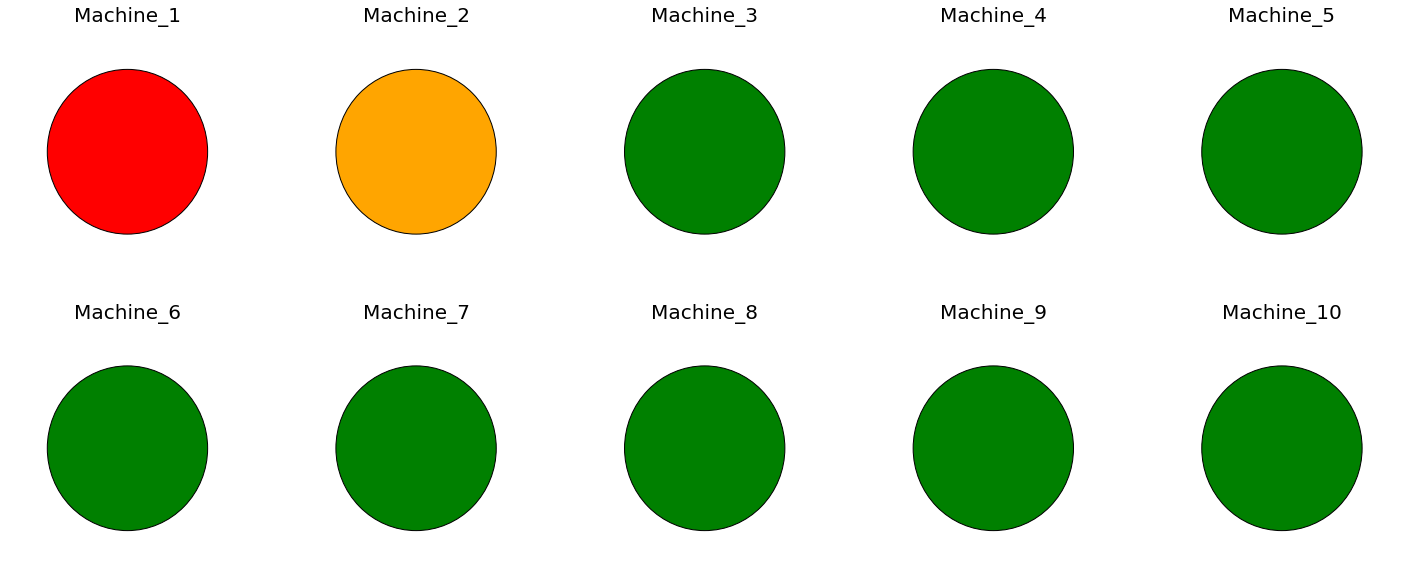

In [215]:
# machines
from matplotlib.patches import Circle
time.sleep(2)
fig, ax = plt.subplots(2, 5,figsize = (25,10))

circle = Circle((2, 2), radius=2, facecolor="red", edgecolor="#000000")
ax[0, 0].add_patch(circle)
ax[0, 0].set_xlim(-1, 5)
ax[0, 0].set_ylim(-1, 5)
ax[0, 0].set_title('Machine_1',fontsize = 20)
ax[0, 0].axis('off')

circle = Circle((2, 2), radius=2, facecolor="orange", edgecolor="#000000")
ax[0, 1].add_patch(circle)
ax[0, 1].set_xlim(-1, 5)
ax[0, 1].set_ylim(-1, 5)
ax[0, 1].set_title('Machine_2',fontsize = 20)
ax[0, 1].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[0, 2].add_patch(circle)
ax[0, 2].set_xlim(-1, 5)
ax[0, 2].set_ylim(-1, 5)
ax[0, 2].set_title('Machine_3',fontsize = 20)
ax[0, 2].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[0, 3].add_patch(circle)
ax[0, 3].set_xlim(-1, 5)
ax[0, 3].set_ylim(-1, 5)
ax[0, 3].set_title('Machine_4',fontsize = 20)
ax[0, 3].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[0, 4].add_patch(circle)
ax[0, 4].set_xlim(-1, 5)
ax[0, 4].set_ylim(-1, 5)
ax[0, 4].set_title('Machine_5',fontsize = 20)
ax[0, 4].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[1, 0].add_patch(circle)
ax[1, 0].set_xlim(-1, 5)
ax[1, 0].set_ylim(-1, 5)
ax[1, 0].set_title('Machine_6',fontsize = 20)
ax[1, 0].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[1, 1].add_patch(circle)
ax[1, 1].set_xlim(-1, 5)
ax[1, 1].set_ylim(-1, 5)
ax[1, 1].set_title('Machine_7',fontsize = 20)
ax[1, 1].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[1, 2].add_patch(circle)
ax[1, 2].set_xlim(-1, 5)
ax[1, 2].set_ylim(-1, 5)
ax[1, 2].set_title('Machine_8',fontsize = 20)
ax[1, 2].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[1, 3].add_patch(circle)
ax[1, 3].set_xlim(-1, 5)
ax[1, 3].set_ylim(-1, 5)
ax[1, 3].set_title('Machine_9',fontsize = 20)
ax[1, 3].axis('off')

circle = Circle((2, 2), radius=2, facecolor="green", edgecolor="#000000")
ax[1, 4].add_patch(circle)
ax[1, 4].set_xlim(-1, 5)
ax[1, 4].set_ylim(-1, 5)
ax[1, 4].set_title('Machine_10',fontsize = 20)
ax[1, 4].axis('off')

## Customer Analysis

In [216]:
# 
import pyecharts.charts as pyec

from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line

time.sleep(2)

category = a.Findfield('category')
x = [_[0] for _ in category]
y =[_[1] for _ in category]
bar1 = pyec.Bar()#实例化对象
bar1.add_xaxis(x)#给一个空白柱状图添加横坐标数据
bar1.add_yaxis(series_name='',y_axis=y)#图例和y轴的坐标
bar1.render_notebook()#显示在notebook笔记本上
bar1.set_global_opts(title_opts=opts.TitleOpts(title="Category"))

size = a.Findfield('size')
x = [_[0] for _ in size]
y =[_[1] for _ in size]
bar2 = pyec.Bar()#实例化对象
bar2.add_xaxis(x)#给一个空白柱状图添加横坐标数据
bar2.add_yaxis(series_name='',y_axis=y)#图例和y轴的坐标
# bar2.set_global_opts(title_opts=opts.TitleOpts(title="Grid-Bar"))
bar2.set_global_opts(title_opts=opts.TitleOpts(title="Size",pos_left='2%',pos_top='55%'))
bar2.render_notebook()#显示在notebook笔记本上


location = a.Findfield('location')
x = [_[0] for _ in location]
y =[_[1] for _ in location]
bar3 = pyec.Bar()#实例化对象
bar3.add_xaxis(x)#给一个空白柱状图添加横坐标数据
bar3.add_yaxis(series_name='',y_axis=y)#图例和y轴的坐标
bar3.set_global_opts(title_opts=opts.TitleOpts(title="Location",pos_left='50%'))
bar3.render_notebook()#显示在notebook笔记本上

order_nums = a.Findfield('order_nums')
x = [_[0] for _ in order_nums]
y =[_[1] for _ in order_nums]
bar4 = pyec.Bar()#实例化对象
bar4.add_xaxis(x)#给一个空白柱状图添加横坐标数据
bar4.add_yaxis(series_name='',y_axis=y)#图例和y轴的坐标
bar4.set_global_opts(title_opts=opts.TitleOpts(title="Orders",pos_top = '55%',pos_left='50%'))
bar4.render_notebook()#显示在notebook笔记本上

grid = (
        Grid()
        .add(bar1, grid_opts=opts.GridOpts(pos_top='5%', pos_bottom="50%", pos_right='45%'))
        .add(bar2, grid_opts=opts.GridOpts(pos_top='60%', pos_bottom="5%", pos_right='45%'))
        .add(bar3, grid_opts=opts.GridOpts(pos_top='5%', pos_bottom="50%", pos_left='58%',pos_right = '-1%'))
        .add(bar4, grid_opts=opts.GridOpts(pos_top='60%', pos_bottom="5%", pos_left='58%',pos_right = '-1%'))
)

grid.render_notebook()